In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

## EDA


In [2]:
# Cargar el dataset
data = pd.read_csv('./hds.csv')

# Mostrar las primeras filas del dataset
data.head()


,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


In [3]:

# Información general del dataset
data.info()

# Estadísticas descriptivas
data.describe()

# Verificar valores nulos
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           70000 non-null  float64
 1   Shortness_of_Breath  70000 non-null  float64
 2   Fatigue              70000 non-null  float64
 3   Palpitations         70000 non-null  float64
 4   Dizziness            70000 non-null  float64
 5   Swelling             70000 non-null  float64
 6   Pain_Arms_Jaw_Back   70000 non-null  float64
 7   Cold_Sweats_Nausea   70000 non-null  float64
 8   High_BP              70000 non-null  float64
 9   High_Cholesterol     70000 non-null  float64
 10  Diabetes             70000 non-null  float64
 11  Smoking              70000 non-null  float64
 12  Obesity              70000 non-null  float64
 13  Sedentary_Lifestyle  70000 non-null  float64
 14  Family_History       70000 non-null  float64
 15  Chronic_Stress       70000 non-null 

Chest_Pain             0
Shortness_of_Breath    0
Fatigue                0
Palpitations           0
Dizziness              0
Swelling               0
Pain_Arms_Jaw_Back     0
Cold_Sweats_Nausea     0
High_BP                0
High_Cholesterol       0
Diabetes               0
Smoking                0
Obesity                0
Sedentary_Lifestyle    0
Family_History         0
Chronic_Stress         0
Gender                 0
Age                    0
Heart_Risk             0
dtype: int64

C:\Users\Carlos\AppData\Local\Temp\ipykernel_21852\2580488160.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart_Risk', data=data, palette='Set2')


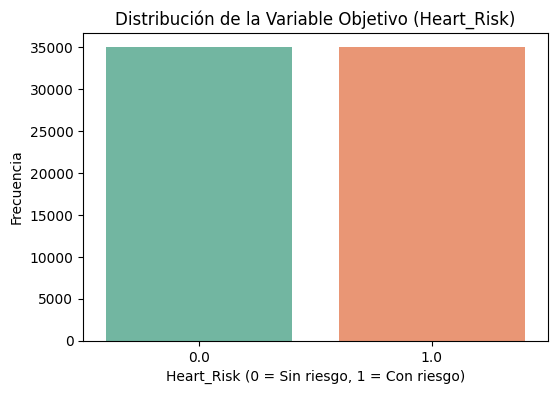

In [4]:
# Distribución de la variable objetivo (Heart_Risk)
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart_Risk', data=data, palette='Set2')
plt.title('Distribución de la Variable Objetivo (Heart_Risk)')
plt.xlabel('Heart_Risk (0 = Sin riesgo, 1 = Con riesgo)')
plt.ylabel('Frecuencia')
plt.show()

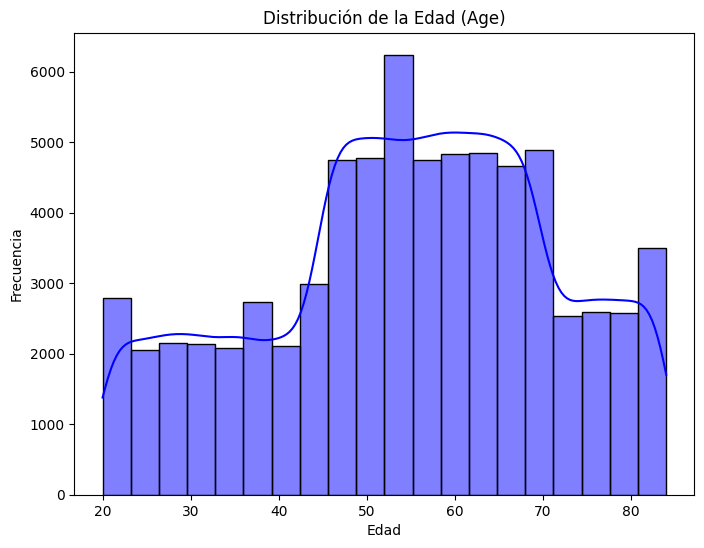

In [5]:
# Distribución de la edad (Age)
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='blue')
plt.title('Distribución de la Edad (Age)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\Carlos\AppData\Local\Temp\ipykernel_21852\3349931105.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='Set3')


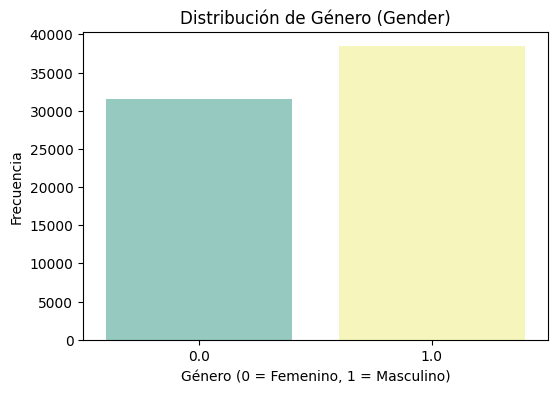

In [6]:
# Distribución de género (Gender)
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data, palette='Set3')
plt.title('Distribución de Género (Gender)')
plt.xlabel('Género (0 = Femenino, 1 = Masculino)')
plt.ylabel('Frecuencia')
plt.show()

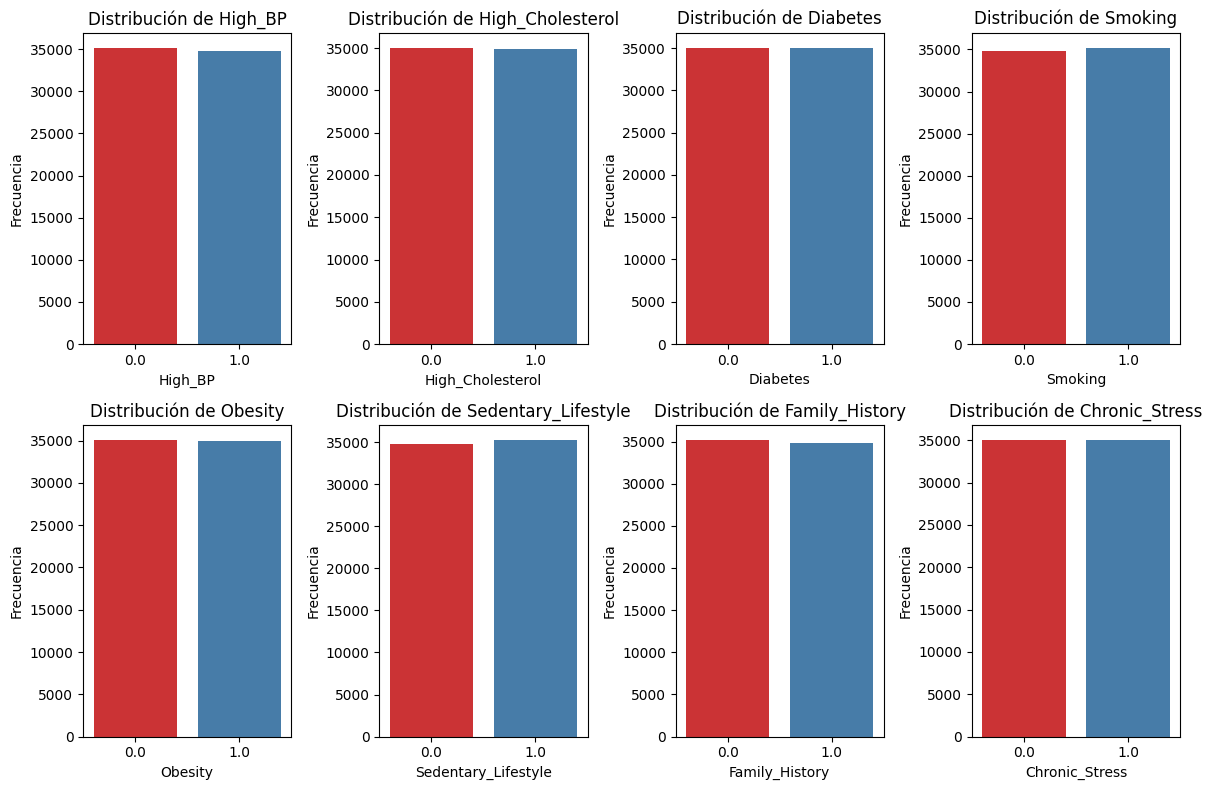

In [7]:
# Distribución de factores de riesgo
risk_factors = ['High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress']
plt.figure(figsize=(12, 8))
for i, factor in enumerate(risk_factors, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=factor, data=data, palette='Set1', hue=factor, legend=False)
    plt.title(f'Distribución de {factor}')
    plt.xlabel(factor)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

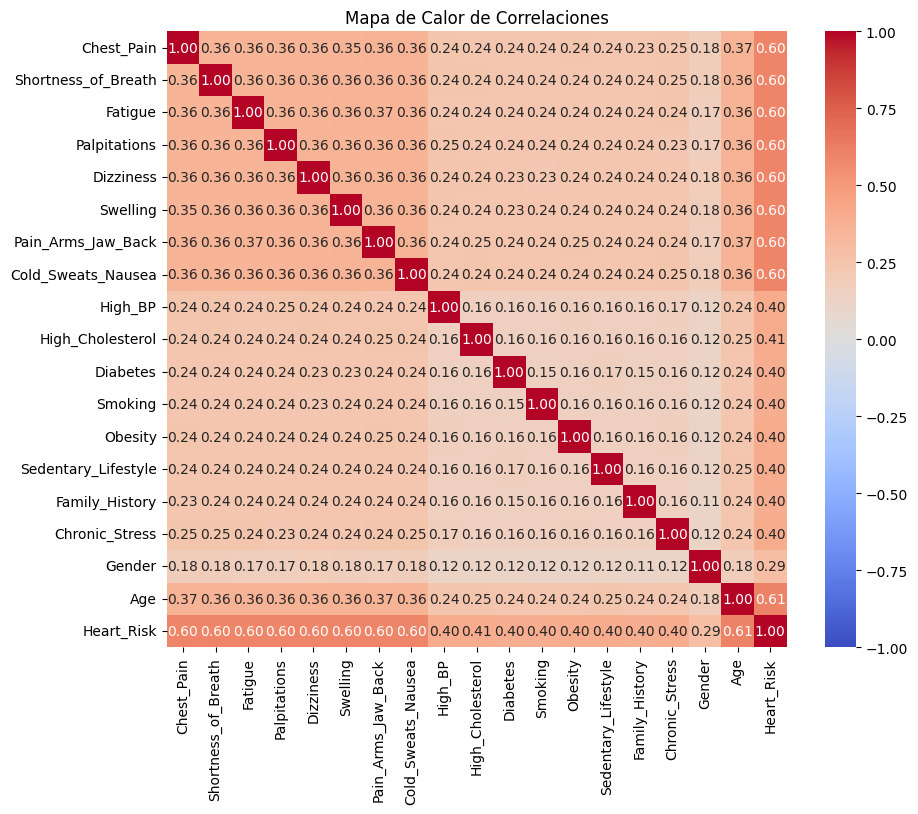

In [8]:
# Correlación entre variables
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

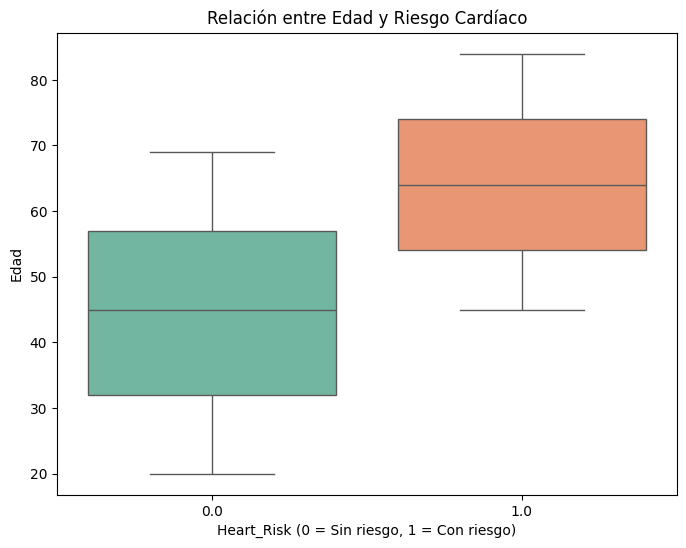

In [9]:
# Relación entre edad y riesgo cardíaco
plt.figure(figsize=(8, 6))
sns.boxplot(x='Heart_Risk', y='Age', data=data, palette='Set2', hue='Heart_Risk', legend=False)
plt.title('Relación entre Edad y Riesgo Cardíaco')
plt.xlabel('Heart_Risk (0 = Sin riesgo, 1 = Con riesgo)')
plt.ylabel('Edad')
plt.show()

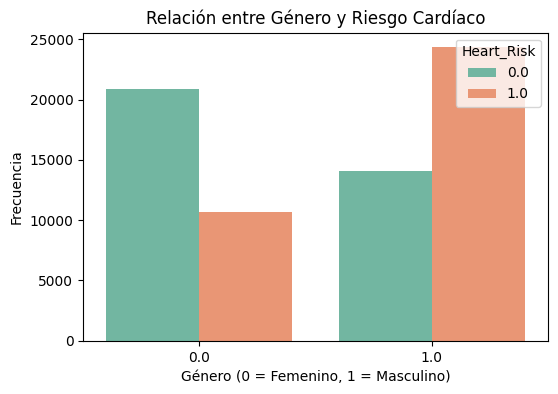

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Heart_Risk', data=data, palette='Set2')
plt.title('Relación entre Género y Riesgo Cardíaco')
plt.xlabel('Género (0 = Femenino, 1 = Masculino)')
plt.ylabel('Frecuencia')
plt.legend(title='Heart_Risk', loc='upper right')
plt.show()

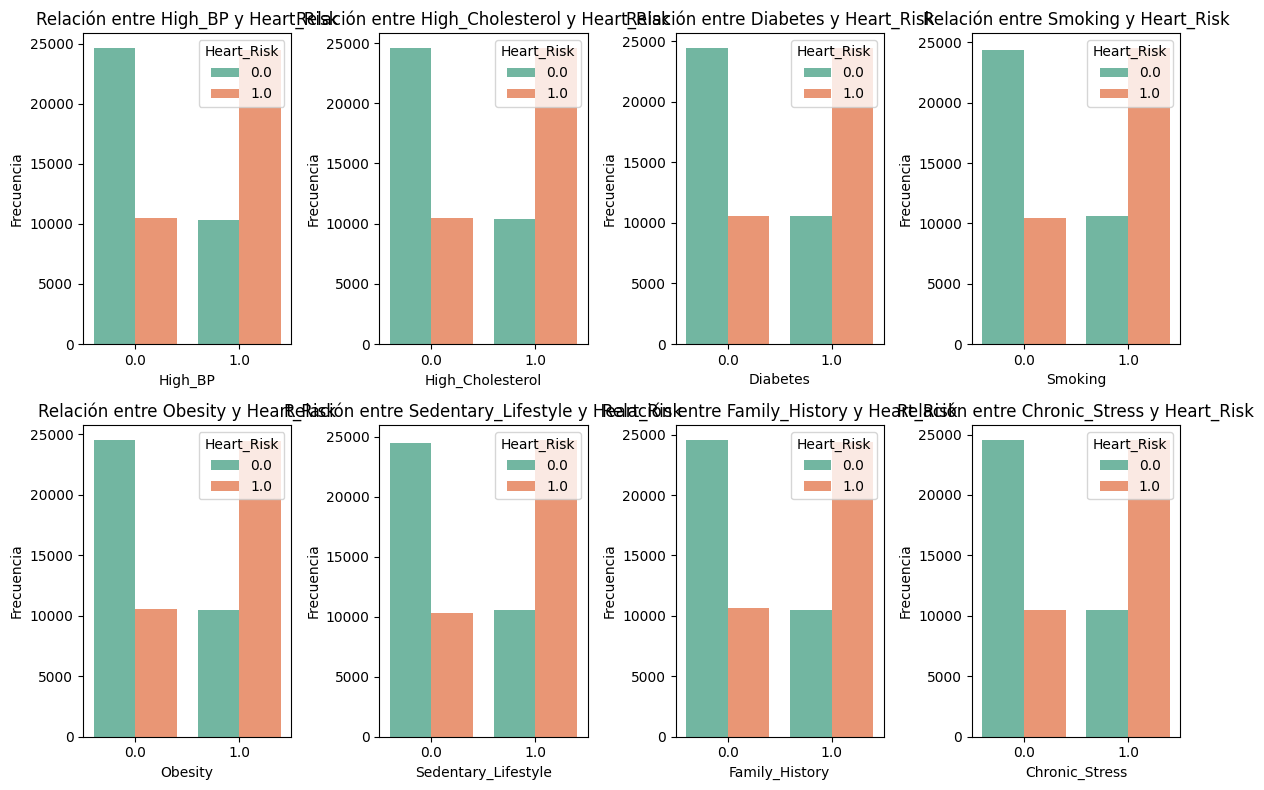

In [11]:
plt.figure(figsize=(12, 8))
for i, factor in enumerate(risk_factors, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=factor, hue='Heart_Risk', data=data, palette='Set2')
    plt.title(f'Relación entre {factor} y Heart_Risk')
    plt.xlabel(factor)
    plt.ylabel('Frecuencia')
    plt.legend(title='Heart_Risk', loc='upper right')
plt.tight_layout()
plt.show()

## Clustering y Prediccion


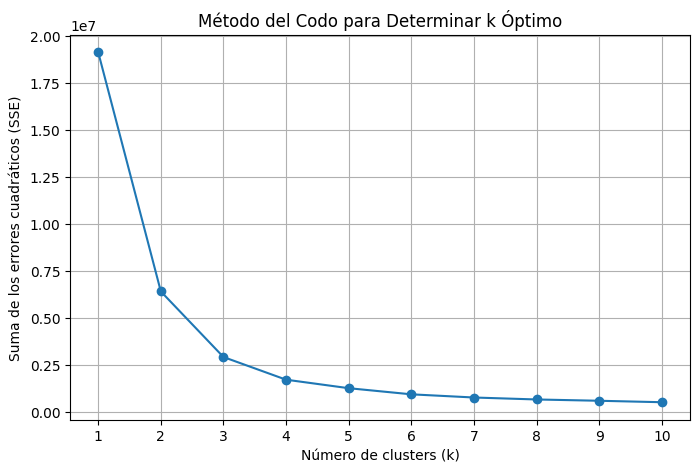

In [12]:
X = data.drop('Heart_Risk', axis=1)

# Método del codo para determinar el número óptimo de clusters
sse = []
k_values = range(1, 11)  # Probamos con k desde 1 hasta 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # inertia_ es la suma de los errores cuadráticos (SSE)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de los errores cuadráticos (SSE)')
plt.title('Método del Codo para Determinar k Óptimo')
plt.xticks(k_values)
plt.grid()
plt.show()

In [13]:
optimal_k = 3
# Aplicar KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

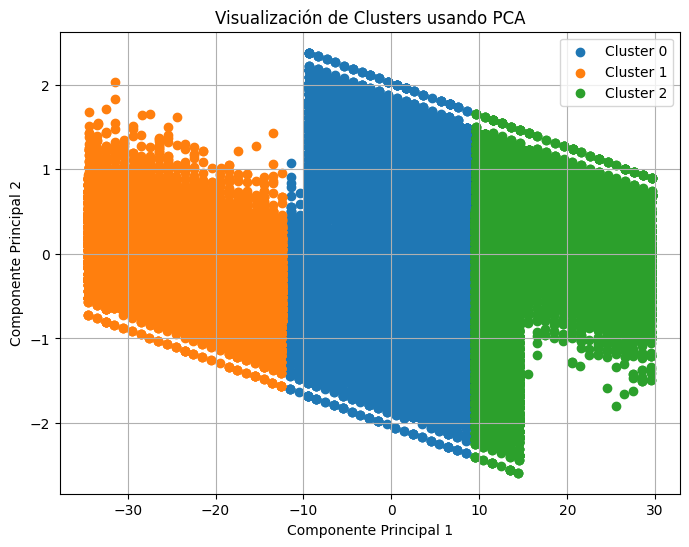

In [14]:
# Visualización de los clusters usando PCA para reducción de dimensionalidad
pca = PCA(n_components=2)  # Reducimos a 2 dimensiones para visualización
X_pca = pca.fit_transform(X)  # Transformamos los datos a 2D

# Crear un scatter plot de los clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(
        X_pca[data['Cluster'] == cluster, 0],  # Componente principal 1
        X_pca[data['Cluster'] == cluster, 1],  # Componente principal 2
        label=f'Cluster {cluster}'
    )
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de Clusters usando PCA')
plt.legend()
plt.grid()
plt.show()

In [15]:
models = {}
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    X_cluster = cluster_data.drop(['Heart_Risk', 'Cluster'], axis=1)
    y_cluster = cluster_data['Heart_Risk']
    
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    models[cluster] = model


In [16]:
def predict_with_clusters(new_data):
    # Predecir el cluster para los nuevos datos
    cluster = kmeans.predict(new_data)
    
    # Seleccionar el modelo correspondiente al cluster predicho
    model = models[cluster[0]]
    
    # Predecir usando el modelo seleccionado
    prediction = model.predict(new_data)
    
    return prediction

In [17]:
new_data = pd.DataFrame({
    'Chest_Pain': [1.0],
    'Shortness_of_Breath': [1.0],
    'Fatigue': [1.0],
    'Palpitations': [1.0],
    'Dizziness': [1.0],
    'Swelling': [1.0],
    'Pain_Arms_Jaw_Back': [1.0],
    'Cold_Sweats_Nausea': [1.0],
    'High_BP': [1.0],
    'High_Cholesterol': [0.0],
    'Diabetes': [0.0],
    'Smoking': [1.0],
    'Obesity': [1.0],
    'Sedentary_Lifestyle': [1.0],
    'Family_History': [1.0],
    'Chronic_Stress': [0.0],
    'Gender': [1.0],
    'Age': [90.0]
})

prediction = predict_with_clusters(new_data)
print(f"Predicción: {prediction[0]}")

Predicción: 1.2513044182312434
